# Laplace approximation - 01 

# _Josep Fortiana_ $\hskip3cm$ 2023-05-22

***
###### LaTeX macros
$ \def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\cL{\cal L}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\expdist{\operatorname{Exp}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\def\laplacedist{\operatorname{Laplace}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\normaldist{\operatorname{N}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

From Rasmus Bååth blog: 
[Easy Laplace Approximation of Bayesian Models in R,](http://www.sumsar.net/blog/2013/11/easy-laplace-approximation/) by 

# 01 - Model: likelihood, prior, non normalized posterior

Binomial likelihood - Uniform prior

In [1]:
n1<-10
n0<-8
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

# 02 - Laplace approximation

In [2]:
# q=log(Lik)
# Equating q'(theta)=0
mu<-n1/n
round(mu,4)

[1] 0.5556

In [3]:
# sigma2= 1/|q''(n1/n)|
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.0137

[1] 0.1171

In [4]:
# Normalize to give the posterior pdf
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}

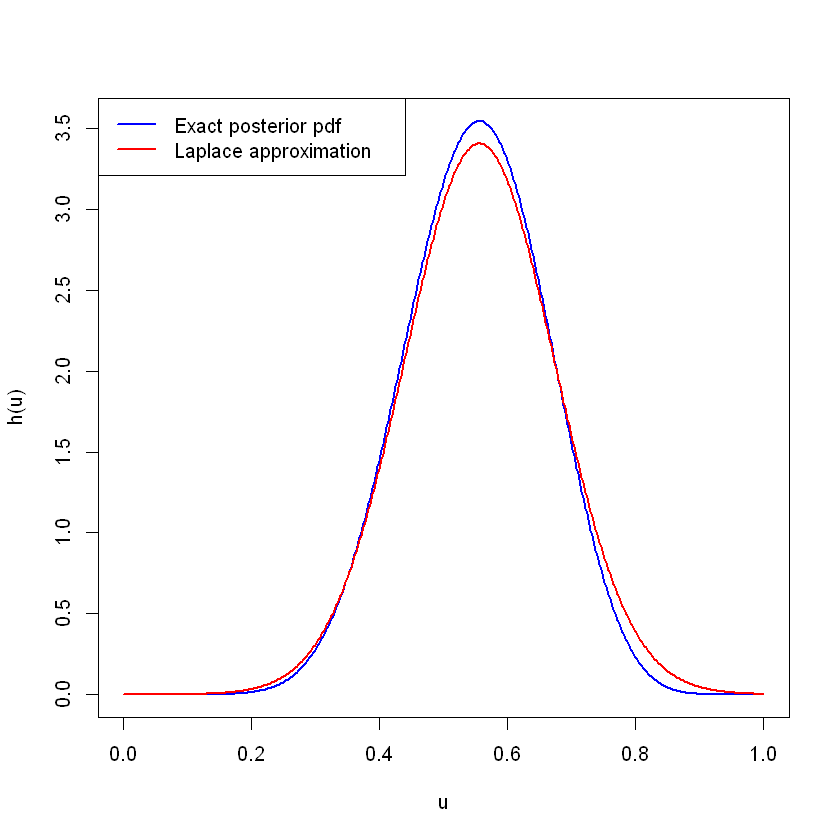

In [5]:
# Plot posterior pdf 
u<-seq(0,1,length=500)
options(repr.plot.width=7,repr.plot.height=7)
plot(u,h(u),"l",lwd=2,col="blue")
# Superimpose Laplace approximation
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
# Alternatively, using the fact that the model is Beta-Binomial, thus the posterior is
# Beta(n1+1,n0+1)
# lines(u,dbeta(u,shape1=n1+1,shape2=n0+1),col="green",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

# 03 - Same Laplace approximation, now with number of heads $n_{1}=4$ and $n_{0}=2$

In [6]:
n1<-4
n0<-2
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

In [7]:
mu<-n1/n
round(mu,4)
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.6667

[1] 0.037

[1] 0.1925

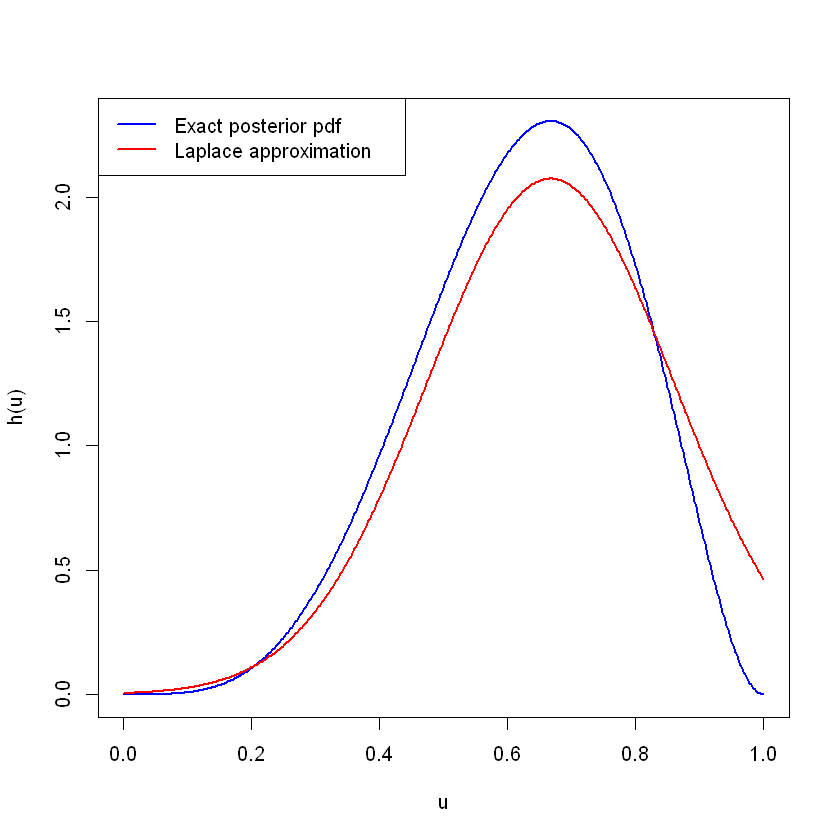

In [8]:
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}
u<-seq(0,1,length=500)
options(repr.plot.width=7,repr.plot.height=7)
plot(u,h(u),"l",lwd=2,col="blue")
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

A worse approximation: posterior was more asymmetric

# 04 - Normal data with a known $\mu$ and unknown $\sigma$ (parameter to investigate)
 
### Flat prior for $\sigma$

Likelihood is normal with known $\mu$ and unknown standard deviation $\sigma$.

Assume a flat prior for $\sigma$.

Laplace approximate posterior of the standard deviation $\sigma$.

Generate a sample of $n$ random numbers distributed as $\normaldist(10, 4)$. 

In [9]:
#install.packages("extraDistr",dependencies=TRUE,repos="https://cloud.r-project.org")
require(extraDistr)

Loading required package: extraDistr



In [10]:
mu<-10
n<-40  # n was 8 in the original post
sigma.data.gen<-4
x<-rnorm(n = n, mean = mu, sd = sigma.data.gen)
## [1] 10.770  4.213  8.707 16.489  7.244 18.168 13.775 18.328
str(x) 

 num [1:40] 4.1 11.69 15.53 9.96 4.22 ...


## Deriving Laplace approximation

### Likelihood = Non-normalized posterior (flat prior)

$$
    \cL (\sigma)= (2\pi)^{-\,n/2}\cdot \sigma^{-\,n}\cdot\exp\left\{-\,\dfrac{1}{2\sigma^{2}}\sum_{i=1}^{n}(x_{i}-\mu)^{2}\right\}
$$

### Log-likelihood

$$
    q(\sigma)=\log\cL (\sigma)= -\,\dfrac{n}{2}\,\log(2\pi) -\,n\cdot\log(\sigma) -\,\dfrac{n}{2\sigma^{2}}\cdot s^{2}(\mu),
    \mskip40mu\text{where}\mskip10mu s^{2}(\mu)=\dfrac{1}{n}\,\sum_{i=1}^{n}(x_{i}-\mu)^{2}
$$

### First derivative and ML estimate of $\sigma^{2}$ $=$ MAP (mode of the posterior pdf)

$$
    q'(\sigma)= -\,\dfrac{n}{\sigma}+\dfrac{n}{\sigma^{3}}\cdot s^{2}(\mu),
$$

Equating to zero,

$$
    \hat{\sigma}^{2}=\operatorname{MAP}(\sigma)=s^{2}(\mu)
$$

### Second derivative and variance of Laplace approximation

$$
    q''(\sigma)= \dfrac{n}{\sigma^{2}}-\dfrac{3\,n}{\sigma^{4}}\cdot s^{2}(\mu),
$$

At the mode: $\sigma=s(\mu)=\sqrt{s^{2}(\mu)}$.

$$
    q''(s(\mu))= \dfrac{n}{s^{2}(\mu)}-\,\dfrac{3\,n}{s^{2}(\mu)}=-\,\dfrac{2\,n}{s^{2}(\mu)}.
$$

Variance of Laplace approximation $=|\,q''(s(\mu))\,|$

In [11]:
s2mu<-sum((x-mu)^2)/n
Laplace.Approx.mean<-s2mu
Laplace.Approx.sd<-sqrt(2/n)*s2mu
round(c(Laplace.Approx.mean,Laplace.Approx.sd),4)

[1] 13.3110  2.9764

### Exact posterior pdf

Exact posterior pdf, in terms of $v=\sigma^{2}$ is:

$$
    h(v\,|\,x)\propto v^{-n/2}\cdot\big\{-\dfrac{n\,s^2(\mu)}{2\,v}\big\}.
$$

This is an inverse gamma distribution, $\operatorname{IG}(\alpha,\beta)$, where:

$$
    \left\{\begin{array}{ccl}
    \alpha &=&\dfrac{n}{2}-1,\\
    \beta  &=&\dfrac{n\,s^{2}(\mu)}{2}.
    \end{array}\right.
$$

In [12]:
alpha<-n/2-1
beta<-n*s2mu/2

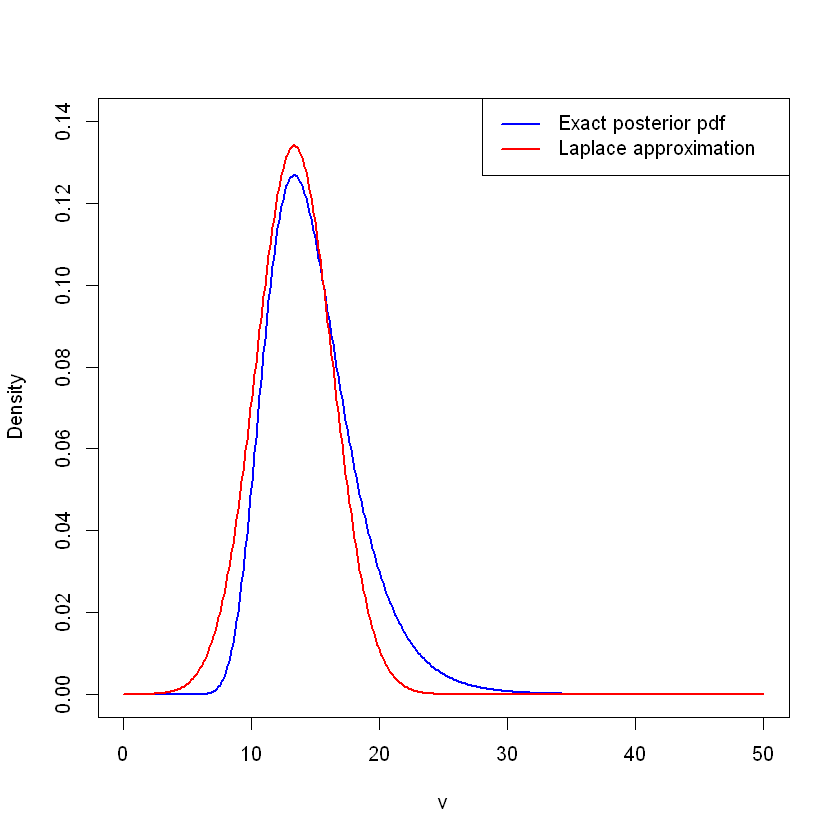

In [13]:
v<-seq(0,50,length=500)
y<-dinvgamma(v,alpha,beta)
y.max<-ceiling(50*max(y))/50
options(repr.plot.width=7, repr.plot.height=7)
plot(v,y,type="l",lwd=2,col="blue",xlab="v",ylab="Density",ylim=c(0,y.max),pin=c(3,3))
lines(v,dnorm(v,mean=Laplace.Approx.mean,sd=Laplace.Approx.sd),lwd=2,col="red")
legend("topright",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

### With the normalized posterior pdf

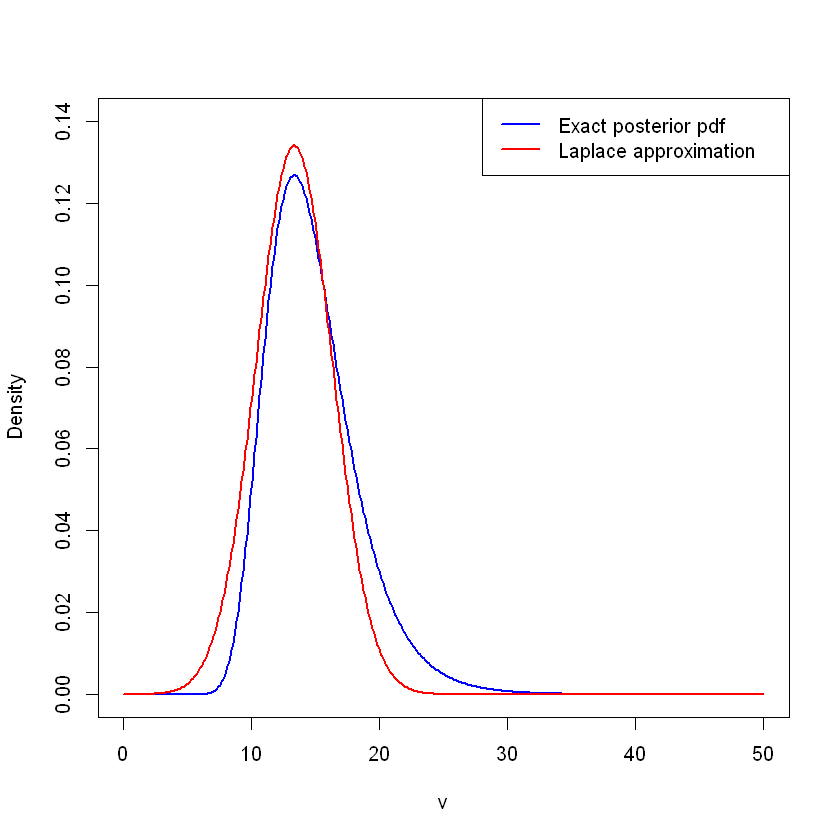

In [14]:
v<-seq(0.00001,50,length=500)
nnh<-function(v){v^{-n/2}*exp(-n*s2mu/(2*v))}
Z<-integrate(nnh,0.0001,50)$value
h<-function(t){nnh(t)/Z}
options(repr.plot.width=7, repr.plot.height=7)
y<-h(v)
#max(y)
y.max<-ceiling(50*max(y))/50
plot(v,y,type="l",lwd=2,col="blue",xlab="v",ylab="Density",ylim=c(0,y.max))
lines(v,dnorm(v,Laplace.Approx.mean,Laplace.Approx.sd),lwd=2,col="red")
legend("topright",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

## 3. Normal data with both parameters unknown

### Sigma with a nonconjugate prior

#### A $\operatorname{LogNormal}$ instead of an inverse gamma $\operatorname{IG}$

$$
    y_{i}\sim\operatorname{Normal}(\mu,\sigma^{2})
$$

$$
    \mu\sim\operatorname{Normal}(0,100^2)
$$

$$
    \sigma\sim\operatorname{LogNormal}(0,4^2)
$$

Here $y$ is $n=20$ datapoints generated like the following:

In [15]:
set.seed(1337)
n<-20
m<-10
s<-5
y <- rnorm(n, mean=m,sd=s)
round(c(mean = mean(y), sd = sd(y)) ,2)

mean    sd 
12.72  5.76

Define a function calculating the unnormalized log posterior of the model above 
given a parameter vector $p$ and a vector of datapoints $y$.

In [16]:
model<-function(p,y){
    log_lik<-sum(dnorm(y,p["mu"],p["sigma"],log=TRUE))  # the log likelihood
    log_post<-log_lik+dnorm(p["mu"],0,100,log = TRUE)+dlnorm(p["sigma"],0,4,log = TRUE)
    return(log_post)
    } 

In [17]:
inits <- c(mu = 0.00001, sigma = 1)
fit <- optim(inits, model, control = list(fnscale = -1), hessian = TRUE, y = y)
fit

,mu,sigma
mu,-0.669971421,-0.001409068
sigma,-0.001409068,-1.418103384


In [18]:
param_mean <- fit$par
param_cov_mat <- solve(-fit$hessian)
round(param_mean, 4)

mu   sigma 
12.7149  5.4641

In [19]:
round(param_cov_mat, 3)

,mu,sigma
mu,1.493,-0.001
sigma,-0.001,0.705


In [20]:
#install.packages("mvtnorm",dependencies=TRUE,repos="https://cloud.r-project.org")
require(mvtnorm)
samples <- rmvnorm(10000, param_mean, param_cov_mat)

Loading required package: mvtnorm



In [21]:
str(samples)

 num [1:10000, 1:2] 13.5 11.7 10.7 13.1 11.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "mu" "sigma"


### Posterior predictive pdf

Now we add a third column, `pred`, where we generate $n$ samples, each from the pdf with the parameters $\mu$ and $\sigma$ from the first two columns.

In [22]:
samples <- cbind(samples, pred = rnorm(n = nrow(samples), samples[, "mu"], samples[,"sigma"]))

In [23]:
str(samples)

 num [1:10000, 1:3] 13.5 11.7 10.7 13.1 11.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "mu" "sigma" "pred"


In [24]:
#install.packages("coda",dependencies=TRUE,repos="https://cloud.r-project.org")
require(coda)
samples.mcmc <- as.mcmc(samples)

Loading required package: coda



In [25]:
str(samples.mcmc)

 'mcmc' num [1:10000, 1:3] 13.5 11.7 10.7 13.1 11.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "mu" "sigma" "pred"
 - attr(*, "mcpar")= num [1:3] 1 10000 1


In [30]:
summary(samples.mcmc)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean     SD Naive SE Time-series SE
mu    12.713 1.2247 0.012247       0.012247
sigma  5.462 0.8462 0.008462       0.007624
pred  12.712 5.6549 0.056549       0.056549

2. Quantiles for each variable:

        2.5%    25%    50%    75% 97.5%
mu    10.320 11.882 12.703 13.540 15.13
sigma  3.809  4.890  5.462  6.035  7.13
pred   1.378  9.014 12.697 16.386 24.05


In [26]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot)

Loading required package: bayesplot

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



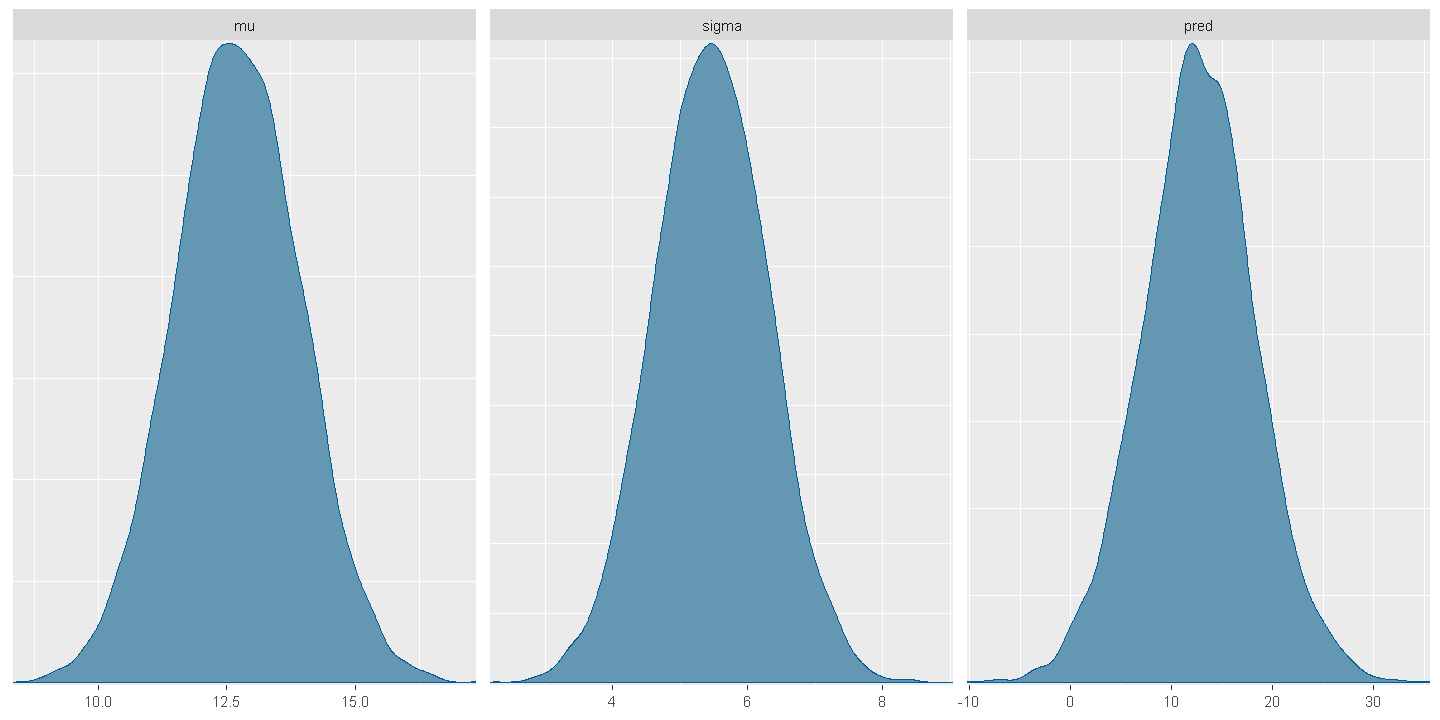

In [29]:
options(repr.plot.width=12, repr.plot.height=6)
mcmc_dens(samples.mcmc)